In [3]:
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
svd_dict = torch.load("../checkpointssvd_dict_ViT-B-16_compress_20.pt")

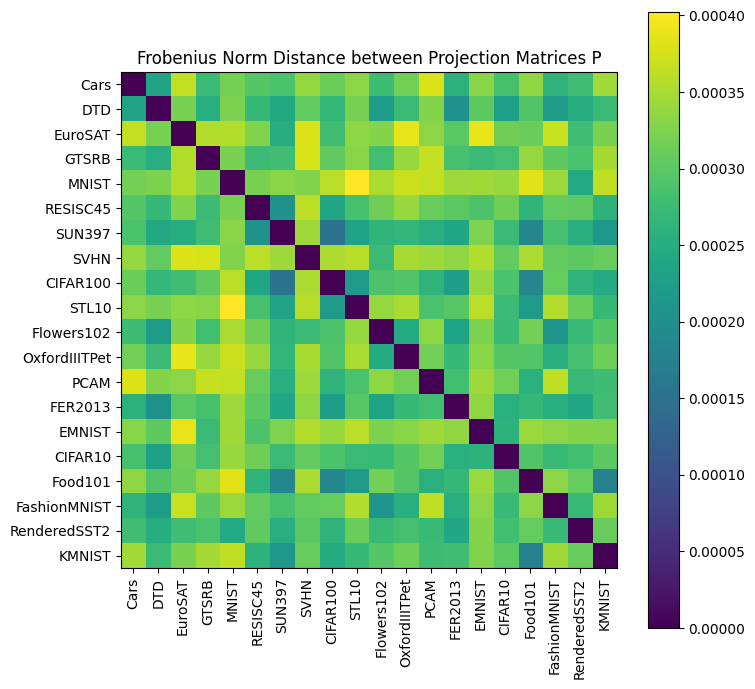

In [9]:
# Assuming svd_dict is already defined and contains the necessary matrices
tasks = list(svd_dict.keys())
num_tasks = len(tasks)

# Compute projection matrices for each task
P_matrices = {}
for task in tasks:
    v = svd_dict[task]["model.visual.transformer.resblocks.11.attn.in_proj_weight"]['v']
    # Compute the projection matrix P = A (A^T A)^(-1) A^T
    P = v @ v.T
    P_matrices[task] = P

# Initialize a matrix to store the Frobenius norm distances
dist_matrix = np.zeros((num_tasks, num_tasks))
for i, task_i in enumerate(tasks):
    for j, task_j in enumerate(tasks):
        P_i = P_matrices[task_i]
        P_j = P_matrices[task_j]
        # Calculate the Frobenius norm of the difference between the two projection matrices
        dist = np.linalg.norm(P_i - P_j, ord='fro')
        dist_matrix[i, j] = dist

# Plot the distance matrix using a heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(dist_matrix, cmap='viridis')
ax.set_xticks(np.arange(num_tasks))
ax.set_yticks(np.arange(num_tasks))
ax.set_xticklabels(tasks, rotation=90)
ax.set_yticklabels(tasks)
fig.colorbar(cax, ax=ax)
ax.set_title("Frobenius Norm Distance between Projection Matrices P")
plt.show()

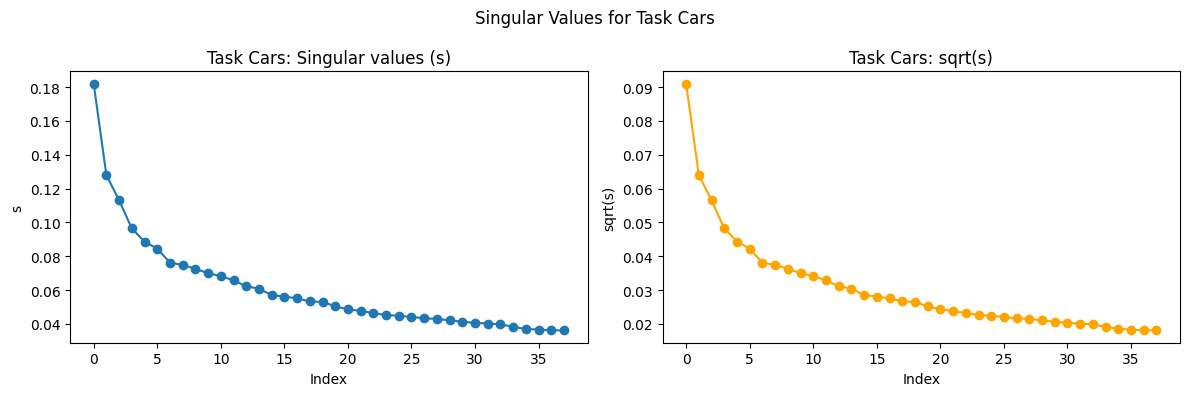

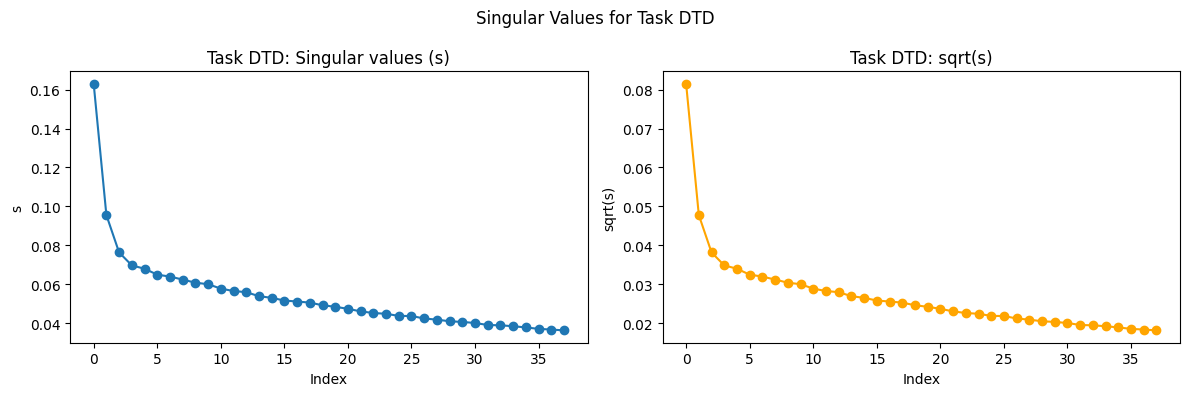

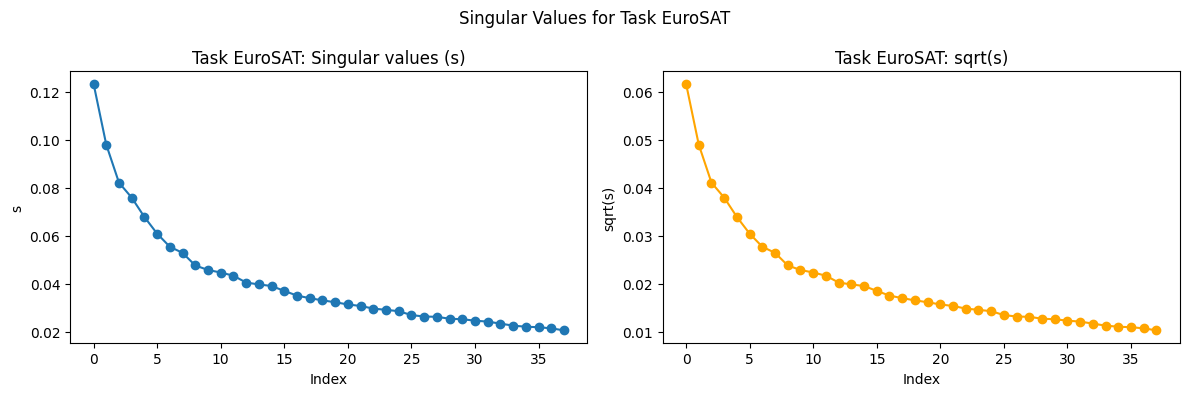

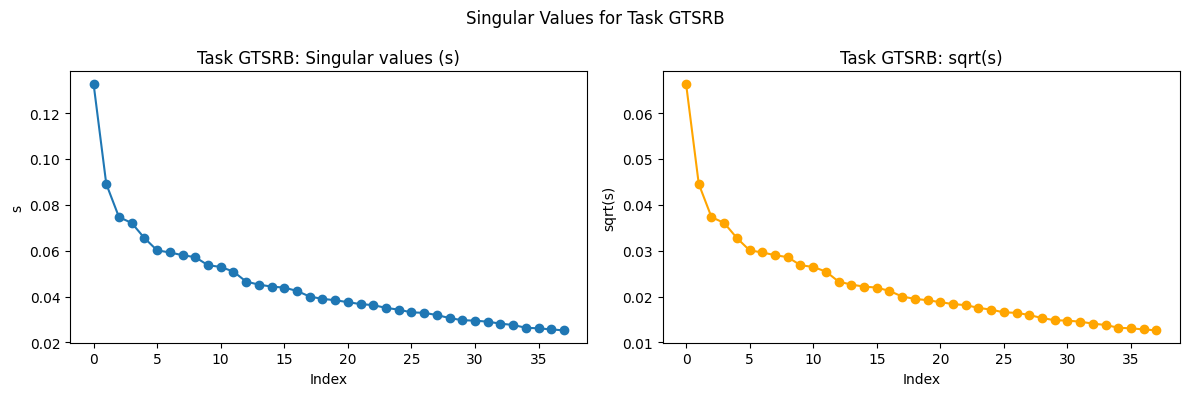

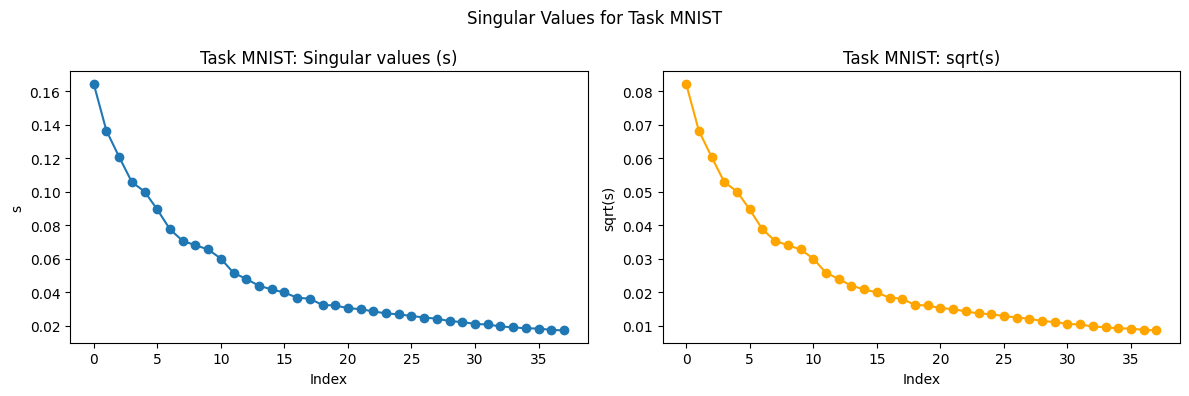

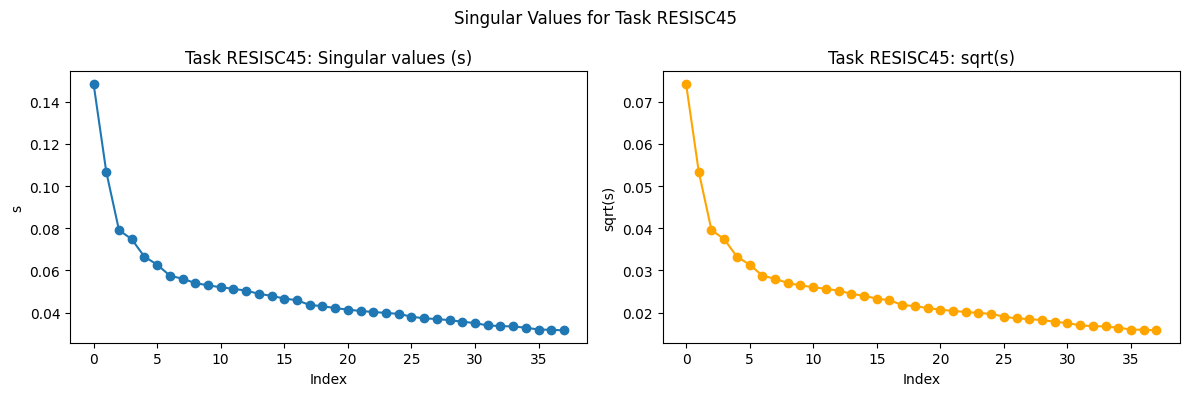

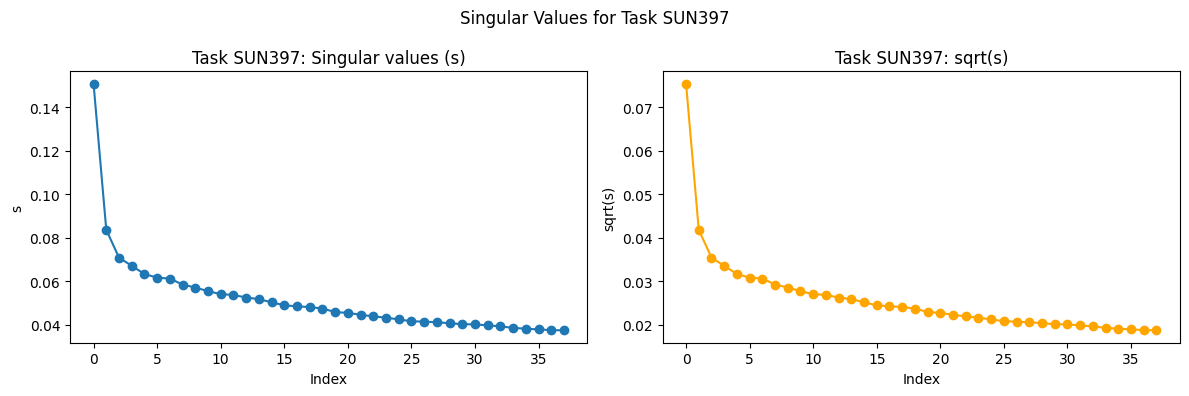

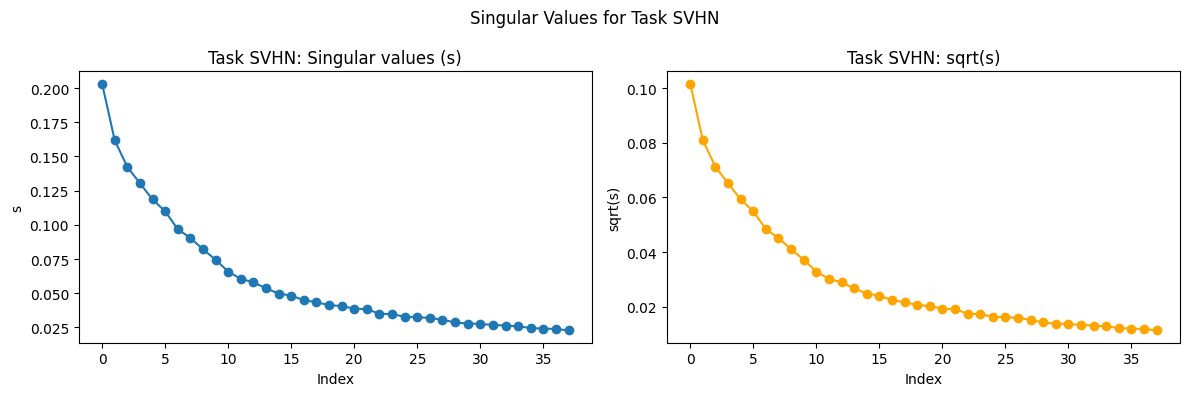

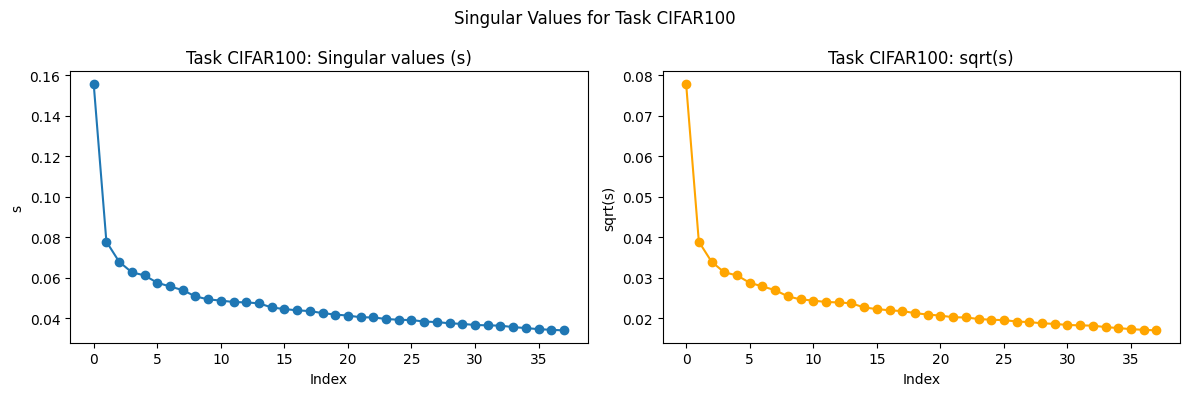

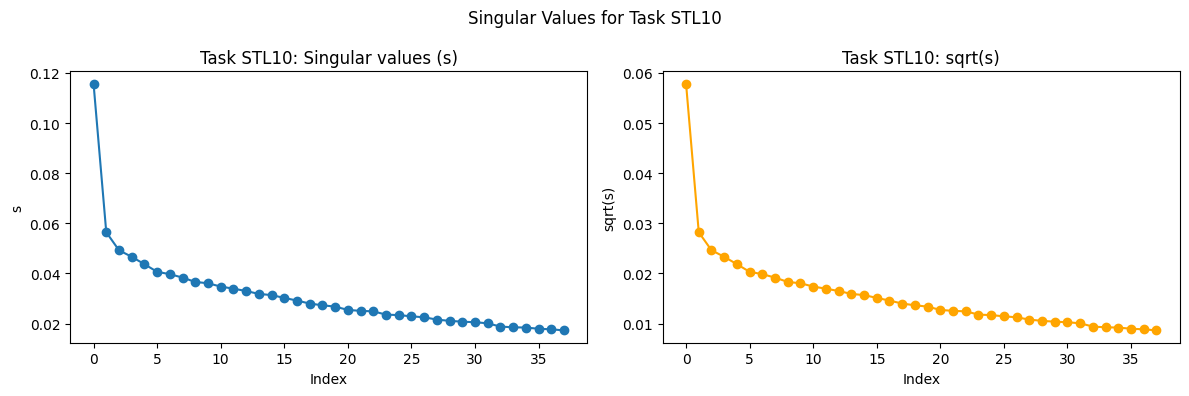

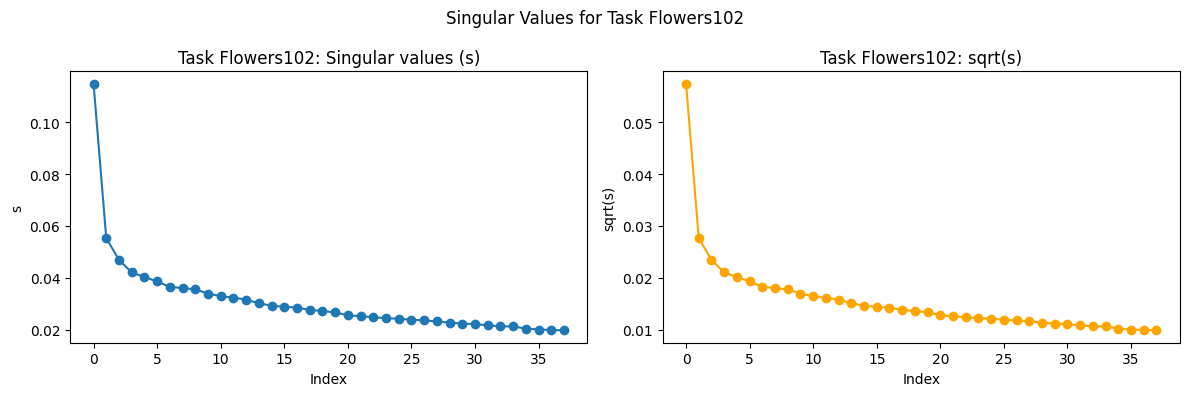

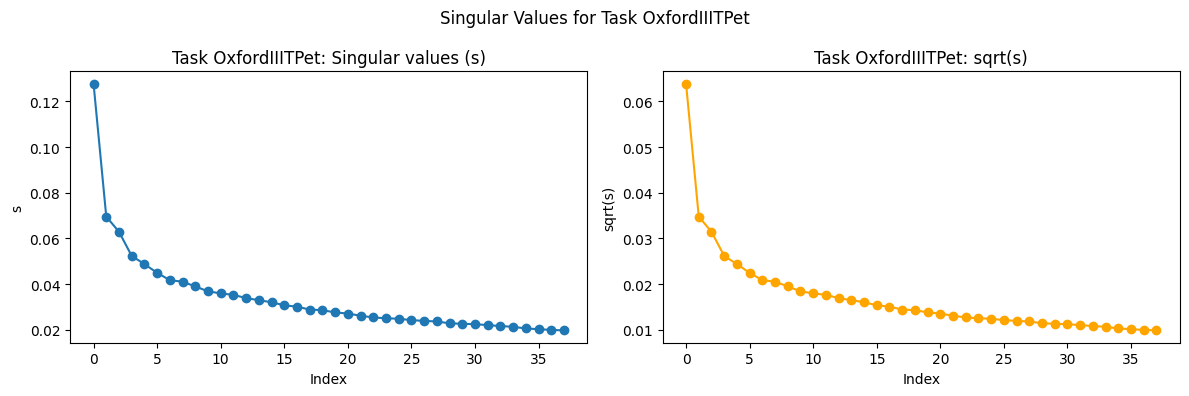

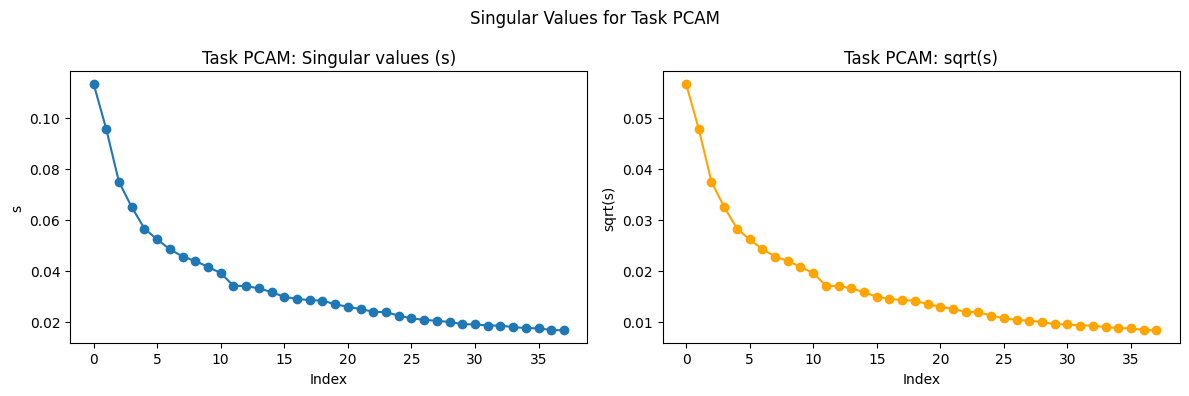

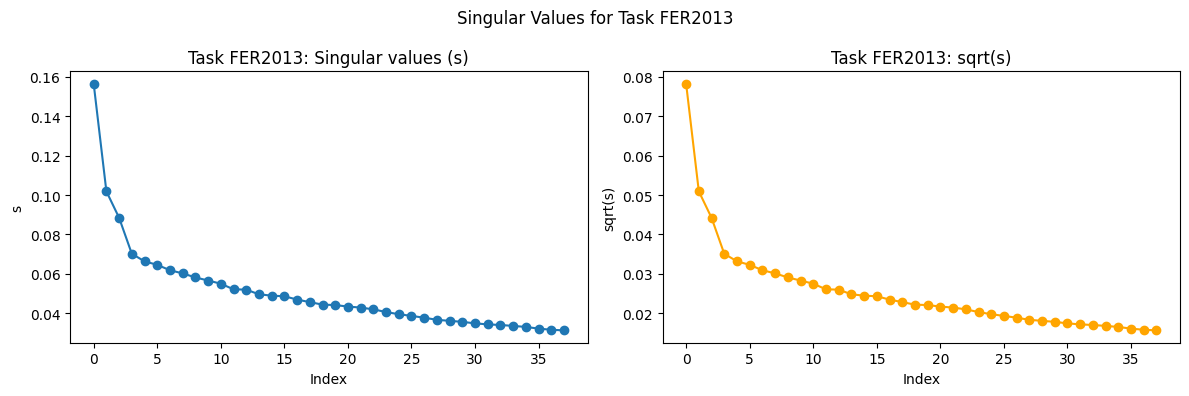

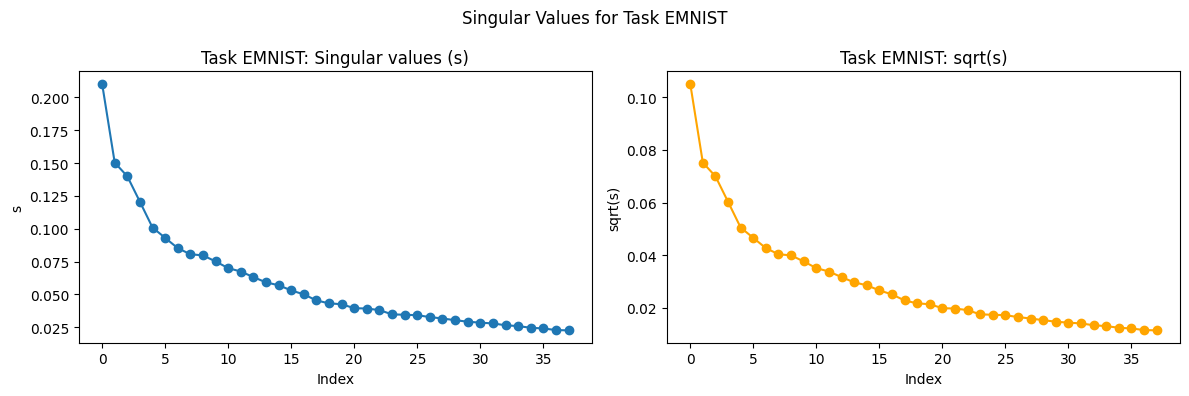

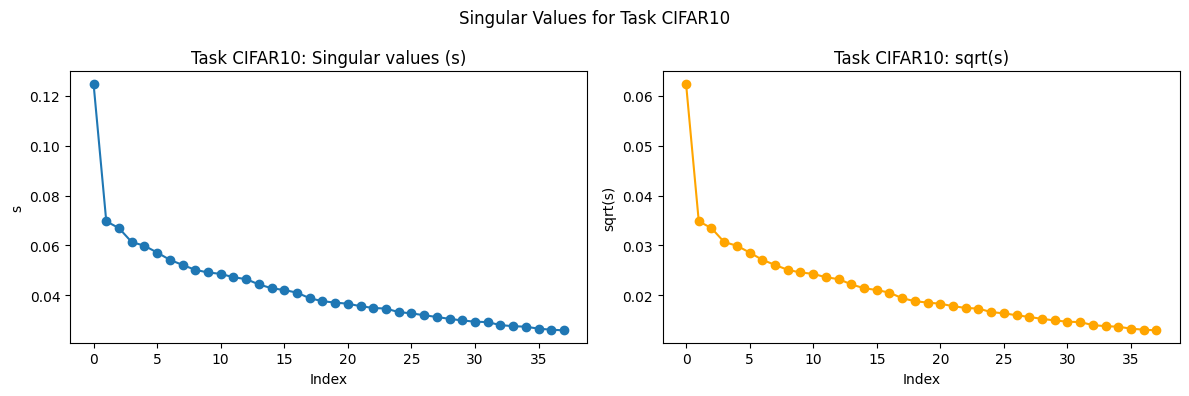

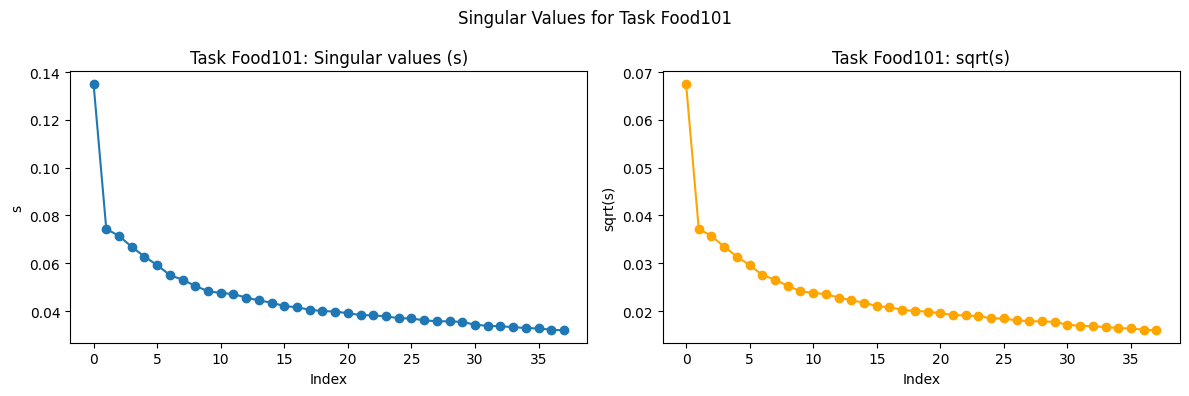

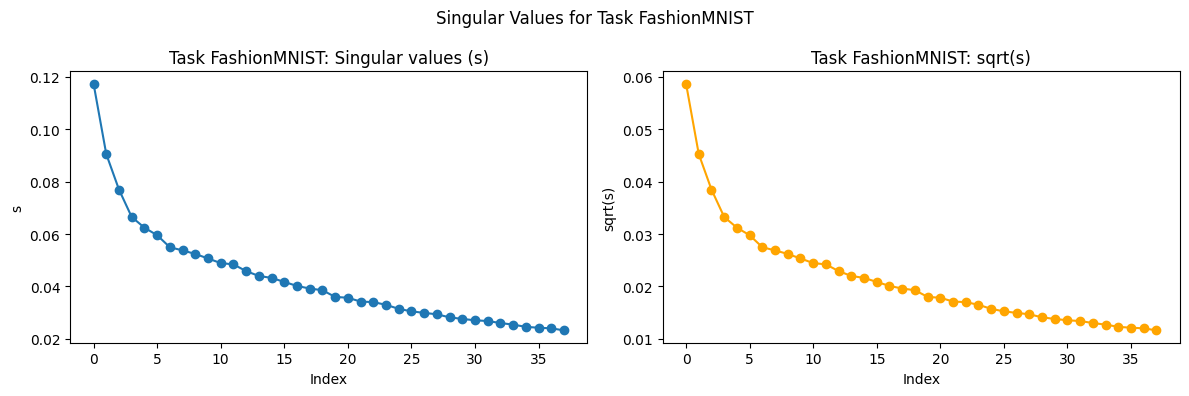

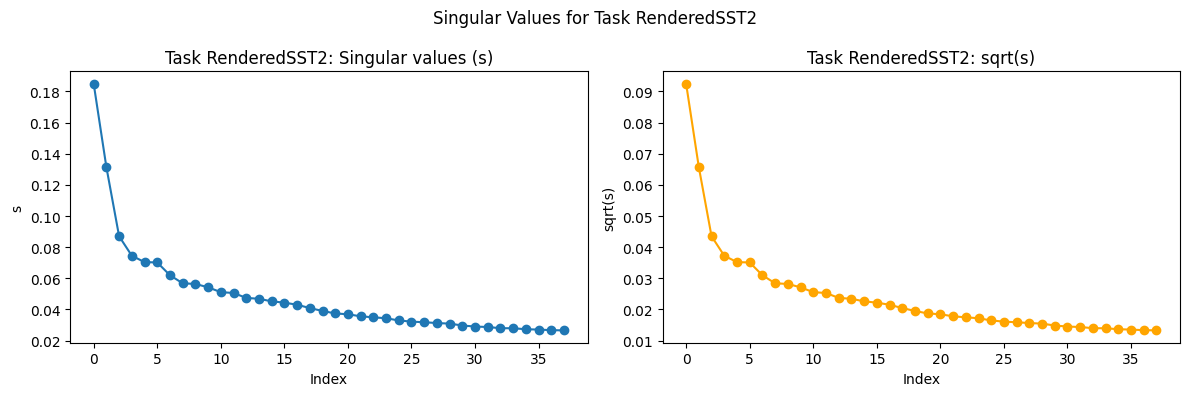

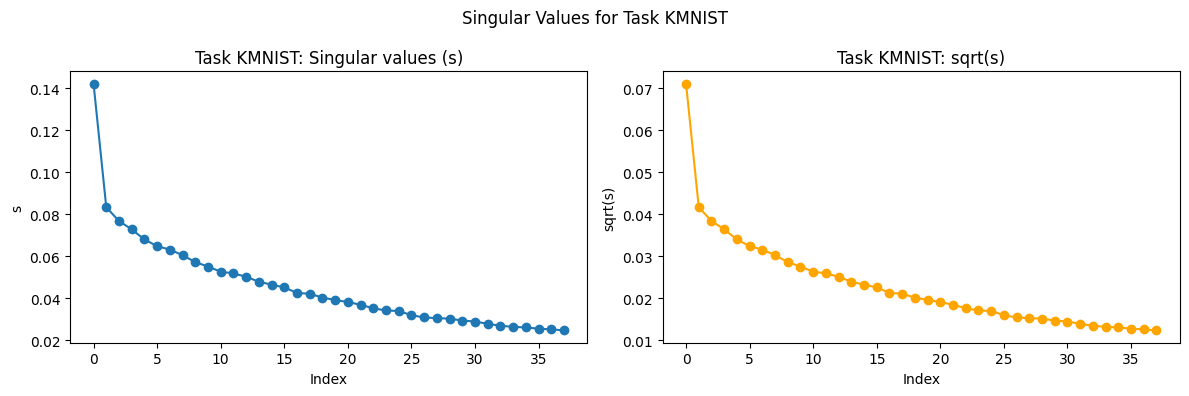

In [18]:
import matplotlib.pyplot as plt
import numpy as np


for task in tasks:

    # Extract the singular values 's' from the svd_dict for the given key
    # Here we assume the key is "model.visual.transformer.resblocks.11.attn.in_proj_weight"
    # and that 's' is stored as a numpy array or something convertible to one.
    s = np.array(svd_dict[task]["model.visual.transformer.resblocks.11.attn.in_proj_weight"]['s'])
    s_sqrt = s ** 1/2
    # Create a figure with two side-by-side subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot the original singular values
    axs[0].plot(s, marker='o')
    axs[0].set_title(f"Task {task}: Singular values (s)")
    axs[0].set_xlabel("Index")
    axs[0].set_ylabel("s")

    # Plot the square root of the singular values
    axs[1].plot(s_sqrt, marker='o', color='orange')
    axs[1].set_title(f"Task {task}: sqrt(s)")
    axs[1].set_xlabel("Index")
    axs[1].set_ylabel("sqrt(s)")
    
    fig.suptitle(f"Singular Values for Task {task}")
    plt.tight_layout()
    plt.show()

